In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download dataset
from sklearn import datasets
housing_dataset = datasets.fetch_california_housing()

In [3]:
# View dataset description
print(housing_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
# List the available features
housing_dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

###### Feature description: https://developers.google.com/machine-learning/crash-course/california-housing-data-description

In [5]:
# Check the number of records and data types
print("California Housing Dataset Features:", housing_dataset.data.shape, housing_dataset.data.dtype)
print("California Housing Dataset Target:", housing_dataset.target.shape, housing_dataset.target.dtype)

California Housing Dataset Features: (20640, 8) float64
California Housing Dataset Target: (20640,) float64


In [6]:
# Create a dataframe to view the features and target together
housing_df = pd.DataFrame(housing_dataset.data, columns=housing_dataset.feature_names)
housing_df['TARGET'] = housing_dataset.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
# Review summary statistics 
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
##Bhargav
from sklearn.preprocessing import StandardScaler

In [9]:
scaler=StandardScaler()
scaler.fit(housing_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
scaled_data=scaler.transform(housing_df)
scaled_data

array([[ 2.34476576,  0.98214266,  0.62855945, ...,  1.05254828,
        -1.32783522,  2.12963148],
       [ 2.33223796, -0.60701891,  0.32704136, ...,  1.04318455,
        -1.32284391,  1.31415614],
       [ 1.7826994 ,  1.85618152,  1.15562047, ...,  1.03850269,
        -1.33282653,  1.25869341],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ...,  1.77823747,
        -0.8237132 , -0.99274649],
       [-1.05458292, -0.84539315, -0.04021111, ...,  1.77823747,
        -0.87362627, -1.05860847],
       [-0.78012947, -1.00430931, -0.07044252, ...,  1.75014627,
        -0.83369581, -1.01787803]])

In [11]:
from sklearn.decomposition import PCA

In [13]:
#converting the data to 2 components
pca=PCA(n_components=2)

In [14]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
x_pca=pca.transform(scaled_data)

In [16]:
#shape gives (rows,features)
scaled_data.shape

(20640, 9)

In [17]:
x_pca.shape

(20640, 2)

In [18]:
scaled_data

array([[ 2.34476576,  0.98214266,  0.62855945, ...,  1.05254828,
        -1.32783522,  2.12963148],
       [ 2.33223796, -0.60701891,  0.32704136, ...,  1.04318455,
        -1.32284391,  1.31415614],
       [ 1.7826994 ,  1.85618152,  1.15562047, ...,  1.03850269,
        -1.33282653,  1.25869341],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ...,  1.77823747,
        -0.8237132 , -0.99274649],
       [-1.05458292, -0.84539315, -0.04021111, ...,  1.77823747,
        -0.87362627, -1.05860847],
       [-0.78012947, -1.00430931, -0.07044252, ...,  1.75014627,
        -0.83369581, -1.01787803]])

In [19]:
x_pca

array([[ 2.34654276,  0.34644059],
       [ 1.76136708,  0.43812372],
       [ 2.33031157, -0.12620806],
       ...,
       [ 0.68738046, -2.0567699 ],
       [ 0.82843475, -2.07324029],
       [ 0.77143988, -1.83274305]])

Text(0, 0.5, 'Second principle component')

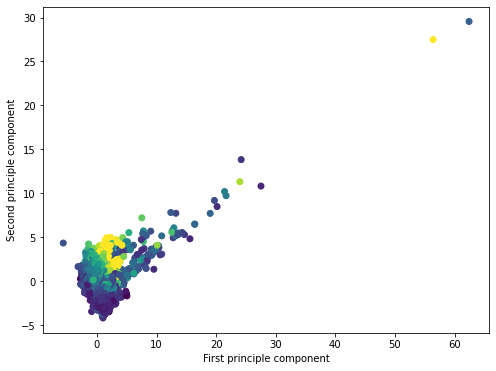

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c=housing_df['TARGET'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')



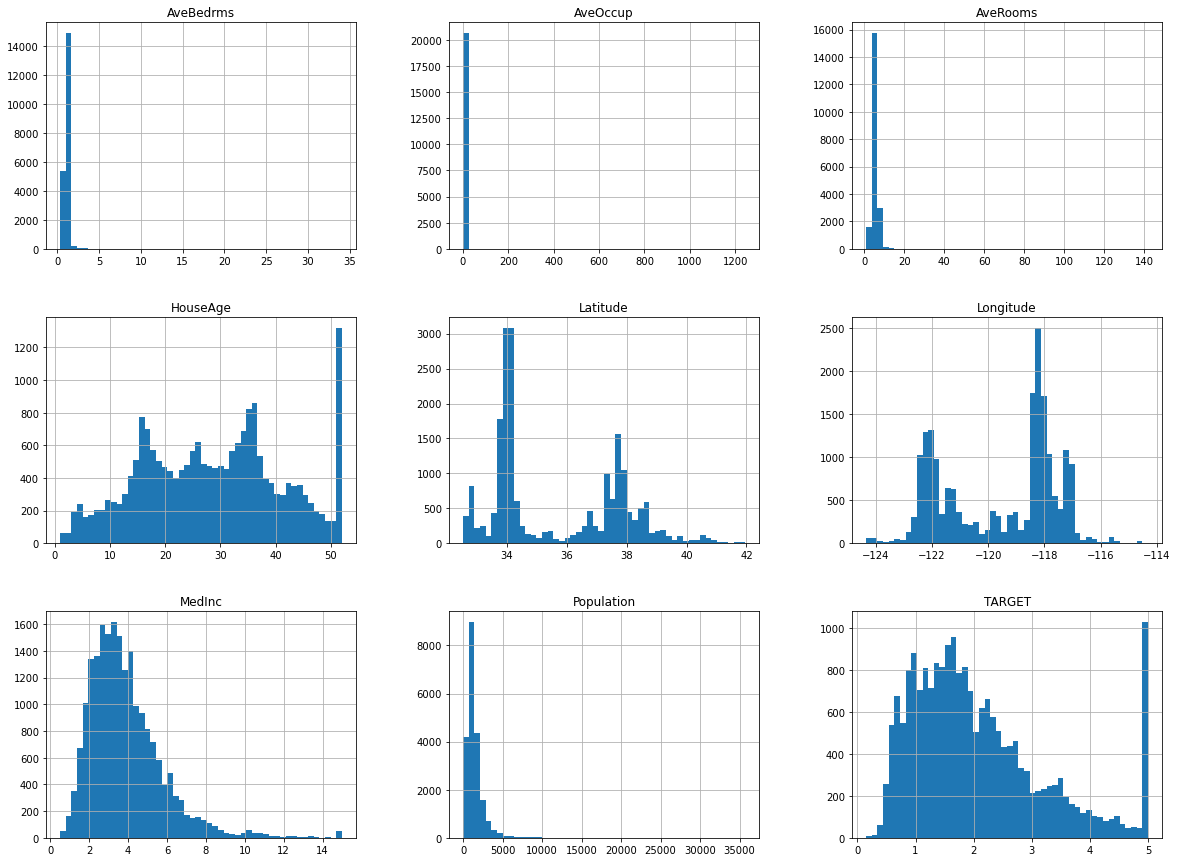

In [15]:
housing_df.hist(bins=50, figsize=(20,15))
plt.show()

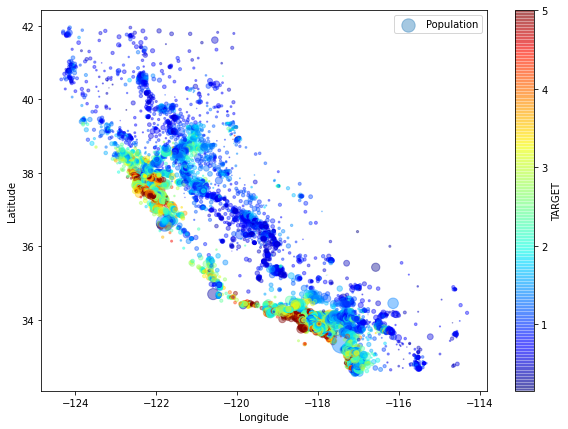

In [9]:
housing_df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
    s=housing_df["Population"]/100, label="Population", figsize=(10,7),
    c="TARGET", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()

In [10]:
corr_matrix = housing_df.corr()
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
TARGET,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [11]:
corr_matrix["TARGET"].sort_values(ascending=False)

TARGET        1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: TARGET, dtype: float64

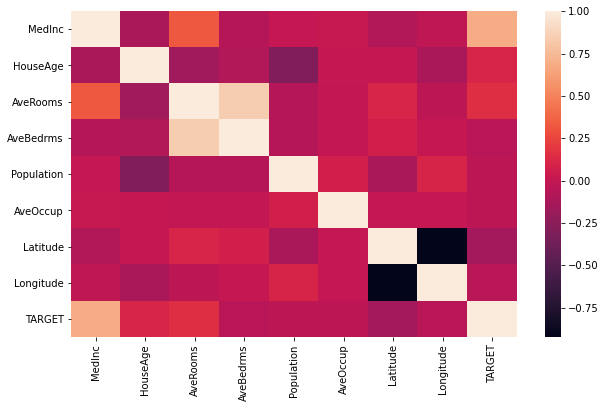

In [12]:
plt.figure(figsize=(10,6))
pltheatmap = sns.heatmap(corr_matrix)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024018D4C898>,
      dtype=object)

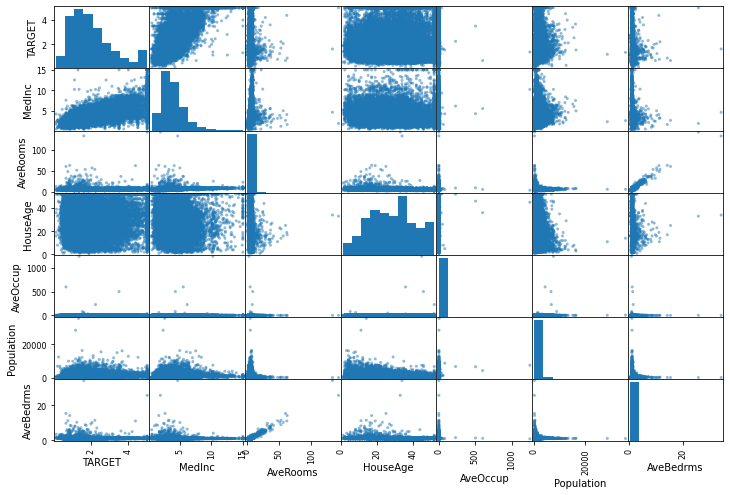

In [13]:
from pandas.plotting import scatter_matrix
attributes = ["TARGET", "MedInc", "AveRooms", "HouseAge", "AveOccup", "Population", "AveBedrms"]
scatter_matrix(housing_df[attributes], figsize=(12, 8))

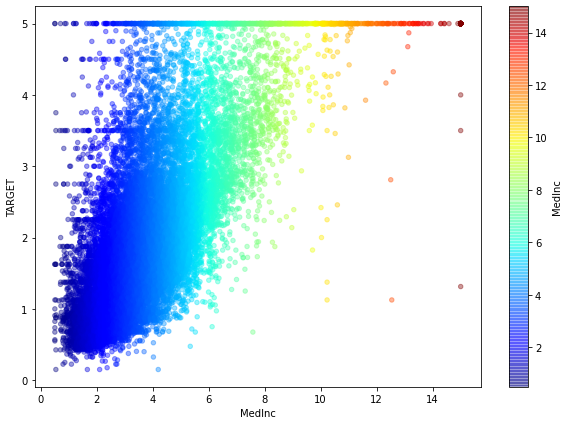

In [18]:
housing_df.plot(kind="scatter", x="MedInc", y="TARGET", alpha=0.4, figsize=(10,7),
                    c="MedInc", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)

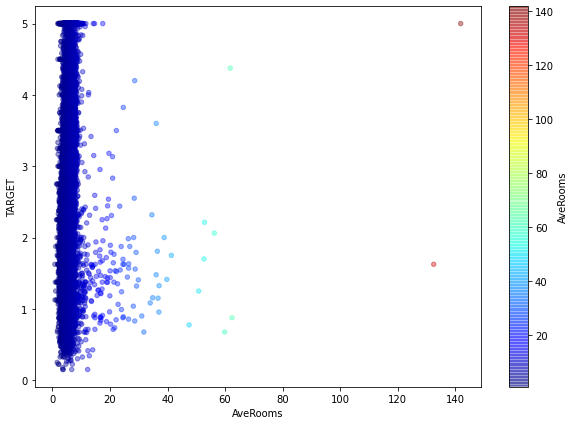

In [19]:
housing_df.plot(kind="scatter", x="AveRooms", y="TARGET", alpha=0.4, figsize=(10,7),
                c="AveRooms", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)

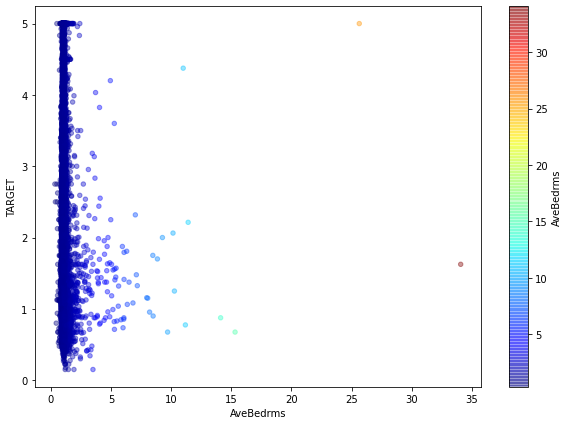

In [20]:
housing_df.plot(kind="scatter", x="AveBedrms", y="TARGET", alpha=0.4, figsize=(10,7),
                c="AveBedrms", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)

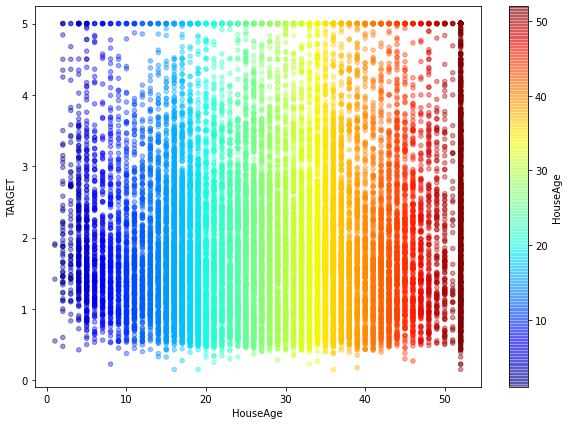

In [21]:
housing_df.plot(kind="scatter", x="HouseAge", y="TARGET", alpha=0.4, figsize=(10,7),
                c="HouseAge", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)

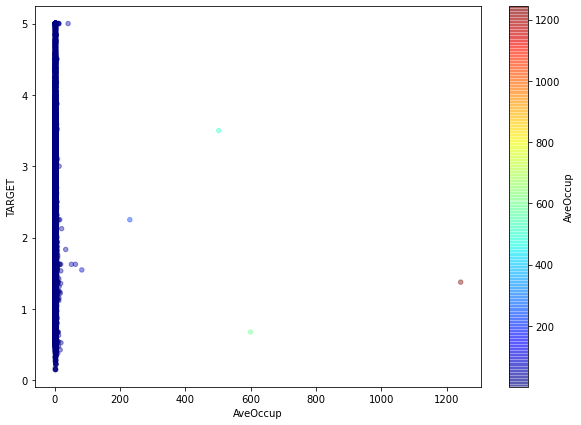

In [22]:
housing_df.plot(kind="scatter", x="AveOccup", y="TARGET", alpha=0.4, figsize=(10,7),
                c="AveOccup", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)

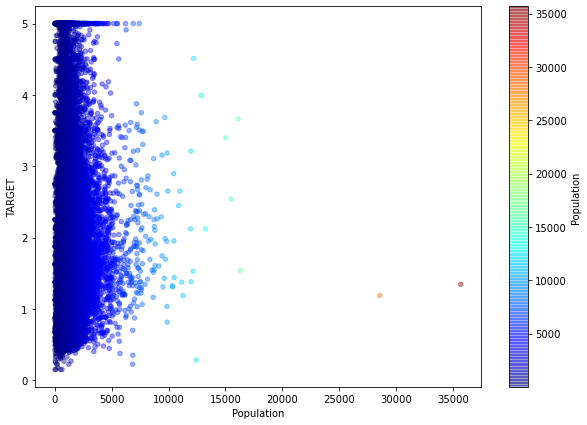

In [23]:
housing_df.plot(kind="scatter", x="Population", y="TARGET", alpha=0.4, figsize=(10,7),
                c="Population", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)

In [24]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X = housing_dataset.data
y = housing_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [25]:
# Import regression metrics to evaluate models
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [26]:
from time import time

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

regressors = [
    LinearRegression(), 
    RANSACRegressor(), 
    KNeighborsRegressor(),
    KNeighborsRegressor(n_neighbors=9, metric='manhattan'),
    SVR(),
    LinearSVR(),
    GaussianProcessRegressor(),
    #SVR(kernel='linear'),
]

In [27]:
for model in regressors:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    predictions = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, predictions))
    print("\tMean absolute error:", mean_absolute_error(y_test, predictions))
    print("\tR2 score:", r2_score(y_test, predictions))
    print()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
	Training time: 0.040s
	Prediction time: 0.000s
	Explained variance: 0.5932507305237852
	Mean absolute error: 0.5351008445282917
	R2 score: 0.5929869285760032

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)
	Training time: 0.098s
	Prediction time: 0.000s
	Explained variance: 0.46269605480484766
	Mean absolute error: 0.5516214053916084
	R2 score: 0.46150395547210177

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
	Training time: 0.045s
	Prediction time: 0.029s
	Explained variance: 0.1333754653693935
	Mean absolute error: 0.82

C:\Users\bandi\.conda\envs\pythonml\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)
	Training time: 1.188s
	Prediction time: 0.001s
	Explained variance: -0.04372380980626711
	Mean absolute error: 0.8558290473737649
	R2 score: -0.20310208894794268

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)
	Training time: 129.869s
	Prediction time: 6.337s
	Explained variance: -0.01993935456355822
	Mean absolute error: 1.913203417625575
	R2 score: -2.794453057313813



In [28]:
from sklearn.linear_model import Lasso, Ridge

lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()

for model in [lr, lasso, ridge]:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(model)
    print("\tExplained variance:", explained_variance_score(y_test, predictions))
    print("\tMean absolute error:", mean_absolute_error(y_test, predictions))
    print("\tR2 score:", r2_score(y_test, predictions))
    print()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
	Explained variance: 0.5932507305237852
	Mean absolute error: 0.5351008445282917
	R2 score: 0.5929869285760032

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
	Explained variance: 0.28970690474140026
	Mean absolute error: 0.7658634070433787
	R2 score: 0.28887951253541155

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
	Explained variance: 0.5932485147044844
	Mean absolute error: 0.535109962954292
	R2 score: 0.5929846671576505



In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

new_regressors = [LinearRegression(),
              DecisionTreeRegressor(max_depth=5),
              DecisionTreeRegressor(max_depth=10),
              DecisionTreeRegressor(max_depth=20),
              RandomForestRegressor(max_depth=10),
              GradientBoostingRegressor(n_estimators=200),
              ]

for model in new_regressors:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(model)
    print("\tExplained variance:", explained_variance_score(y_test, predictions))
    print("\tMean absolute error:", mean_absolute_error(y_test, predictions))
    print("\tR2 score:", r2_score(y_test, predictions))
    print()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
	Explained variance: 0.5932507305237852
	Mean absolute error: 0.5351008445282917
	R2 score: 0.5929869285760032

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
	Explained variance: 0.6141535088942047
	Mean absolute error: 0.5179253361670073
	R2 score: 0.6140595840918429

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weigh

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
spectral = cluster.SpectralClustering(
        n_clusters=4, eigen_solver='arpack',
        affinity="nearest_neighbors")

X = StandardScaler().fit_transform(housing_dataset.data)
spectral.fit(X)

SpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
                   coef0=1, degree=3, eigen_solver='arpack', eigen_tol=0.0,
                   gamma=1.0, kernel_params=None, n_clusters=4,
                   n_components=None, n_init=10, n_jobs=None, n_neighbors=10,
                   random_state=None)

In [31]:
housing_df['category'] = spectral.labels_
housing_clusters = housing_df.groupby('category').mean().sort_values('TARGET')
housing_clusters

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
category,,,,,,,,,
3,3.381931,18.287234,29.195748,6.066689,342.659574,2.498475,37.707766,-119.419574,1.597234
1,3.756794,29.193616,5.469117,1.077953,1209.019547,2.798686,37.919017,-121.664163,1.933959
0,3.315919,36.520879,4.708582,1.050857,1174.851356,3.096355,33.975132,-118.142943,2.041876
2,4.708124,18.715980,5.801621,1.094623,2078.849143,3.479319,33.928652,-117.939347,2.320163


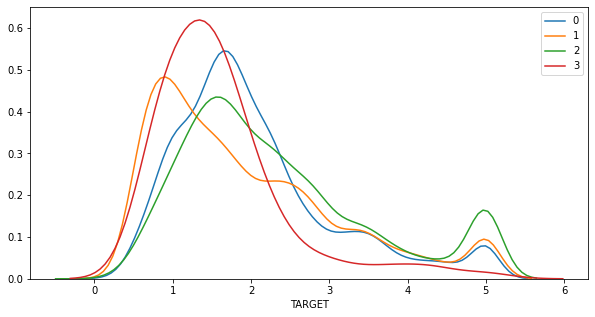

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(housing_df[housing_df.category == 0].TARGET, label="0", hist=False, rug=False)
sns.distplot(housing_df[housing_df.category == 1].TARGET, label="1", hist=False, rug=False)
sns.distplot(housing_df[housing_df.category == 2].TARGET, label="2", hist=False, rug=False)
sns.distplot(housing_df[housing_df.category == 3].TARGET, label="3", hist=False, rug=False)